In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lab11A: Parallel Processing 

**1**. (30 points) Accelerating network bound procedures.

Python code to show PNG images available on the URL `http://people.duke.edu/~ccc14/misc/` is provided.

- Write a funciton `download_one(url, path)` that downloads one image given a `url` and saves the image to `path` (5 points)
    
For the exercises below, save the image file to the local directory using the same fileanme as on `http://people.duke.edu/~ccc14/misc/`. You can just use the `%%time` magic to time the downloads.
 
- Write a for loop to download all images and time how long it takes (5 points)
- Write a function that uses `concurrent.futures` and a thread pool with 4 threads to download all images and time how long it takes (5 points)
- Write a function that uses `multiprocessing` and a process pool with 4 processes to download all images and time how long it takes (5 points)
- Write a function that uses `ipyparallel` and a process pool with 4 processes to download all images and time how long it takes (10 points)

In [3]:
import requests
from bs4 import BeautifulSoup

def listFD(url, ext=''):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'html.parser')
    return [url + node.get('href') for node in soup.find_all('a') 
            if node.get('href').endswith(ext)]

site = 'http://people.duke.edu/~ccc14/misc/'
ext = 'png'
for i, file in enumerate(listFD(site, ext)):
    print(file)

http://people.duke.edu/~ccc14/misc/250px-002Ivysaur.png
http://people.duke.edu/~ccc14/misc/250px-003Venusaur.png
http://people.duke.edu/~ccc14/misc/250px-004Charmander.png
http://people.duke.edu/~ccc14/misc/250px-005Charmeleon.png
http://people.duke.edu/~ccc14/misc/250px-006Charizard.png
http://people.duke.edu/~ccc14/misc/250px-008Wartortle.png
http://people.duke.edu/~ccc14/misc/250px-009Blastoise.png
http://people.duke.edu/~ccc14/misc/250px-012Butterfree.png
http://people.duke.edu/~ccc14/misc/250px-015Beedrill.png
http://people.duke.edu/~ccc14/misc/250px-016Pidgey.png
http://people.duke.edu/~ccc14/misc/250px-017Pidgeotto.png
http://people.duke.edu/~ccc14/misc/250px-018Pidgeot.png
http://people.duke.edu/~ccc14/misc/250px-019Rattata.png
http://people.duke.edu/~ccc14/misc/250px-020Raticate.png
http://people.duke.edu/~ccc14/misc/250px-021Spearow.png
http://people.duke.edu/~ccc14/misc/250px-022Fearow.png
http://people.duke.edu/~ccc14/misc/250px-023Ekans.png
http://people.duke.edu/~ccc14/mi

**Function to download a single image at URL to PATH**

In [4]:
def download_one(url, path='./'):
    import requests
    import re
    img_data = requests.get(url).content
    path += re.findall(r'misc/(.*)',url)[0]
    with open(path, 'wb') as handler:
        handler.write(img_data)
    return True

In [5]:
download_one('http://people.duke.edu/~ccc14/misc/250px-122Mr._Mime.png')

True

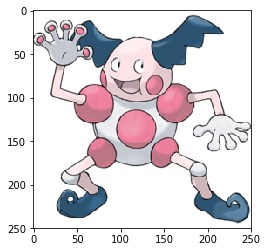

In [6]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.array(imageio.imread('./250px-122Mr._Mime.png')))

**Using for loop**

In [7]:
def download_for(site, ext):
    url_list = listFD(site, ext)
    for url in url_list:
        download_one(url)

In [8]:
%%time
download_for(site, ext)

CPU times: user 404 ms, sys: 188 ms, total: 592 ms
Wall time: 7.87 s


**Using a thread pool**

In [9]:
from concurrent.futures import ThreadPoolExecutor,ProcessPoolExecutor

In [10]:
%%time
with ThreadPoolExecutor(max_workers=4) as pool:
    pool.map(download_one, listFD(site, ext))

CPU times: user 404 ms, sys: 132 ms, total: 536 ms
Wall time: 2.15 s


**Using a process pool**

In [14]:
%%time
with ProcessPoolExecutor(max_workers=4) as pool:
    pool.map(download_one, listFD(site, ext))

CPU times: user 116 ms, sys: 44 ms, total: 160 ms
Wall time: 2.25 s


**Using `ipyparallel`**

In [12]:
from ipyparallel import Client
rc = Client()
dv = rc[:]
rc.ids

[0, 1, 2, 3]

In [13]:
%%time
dv.map_sync(download_one, listFD(site, ext))

CPU times: user 72 ms, sys: 4 ms, total: 76 ms
Wall time: 2.66 s


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]